# 2. Clasificación con el Algoritmo del Perceptrón

Implementaremos una versión básica del algoritmo del *perceptrón* para clasificación binaria.

En este caso los datos de entrada serán de **dos dimensiones**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True) # no usar notación 'e'

## Datos

Usaremos *scikit-learn* ([make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)) para generar datos aleatorios de dos dimensiones, divididos en dos clases etiquetadas con los valores $+1$ y $-1$.

Los datos serán linealmente separables. Fijamos la semilla aleatoria para obtener siempre los mismos resultados.

In [2]:
from sklearn.datasets import make_classification

size = 100
X, y_true = make_classification(n_samples=size, n_features=2, n_classes=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, class_sep=0.5,
                                random_state=1)

# Etiquetas +1 y -1
y_true[y_true == 0] = -1

In [3]:
X.shape, y_true.shape

((100, 2), (100,))

Graficamos para ver el resultado. En esta parte, los *azules* son $+1$, los *rojos* son $-1$.

In [4]:
cPositive = 'dodgerblue'
cNegative = 'tomato'

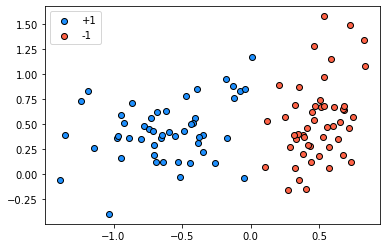

In [5]:
plt.scatter(X[y_true == +1, 0], X[y_true == +1, 1], color=cPositive, edgecolors='k', label="+1")
plt.scatter(X[y_true == -1, 0], X[y_true == -1, 1], color=cNegative, edgecolors='k', label="-1")

plt.legend()
plt.show()

### División en Entrenamiento y Evaluación

In [6]:
train_size = 60
test_size = size - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_true[:train_size], y_true[train_size:]

In [7]:
X_train.shape, X_test.shape

((60, 2), (40, 2))

## Algoritmo del Perceptrón

### Inicialización

Comenzamos a partir de un vector cualquiera:

In [8]:
w = np.ones(2)

w

array([1., 1.])

### Predicción

Definimos la función de predicción:

In [9]:
def predict(X, w):
    """
    Predicción de etiquetas para los datos X, según w.
    """
    return np.sign(np.dot(X, w))

Probamos predecir con el primer modelo:

In [10]:
y_pred = predict(X_test, w)

y_pred

array([ 1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        1.])

In [11]:
y_test

array([-1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        1, -1,  1,  1, -1,  1])

### Evaluación

Calcularemos la *accuracy* sobre los datos de evaluación.

In [12]:
def accuracy(y_true, y_pred):
    """
    Calcula la precisión de nuestro modelo, en base a
    las etiquetas y las predicciones.
    """
    return (y_true == y_pred).sum() / len(y_true)

In [13]:
accuracy(y_test, y_pred)

0.1

En este caso el resultado es muy bajo.

Graficamos la frontera de decisión:

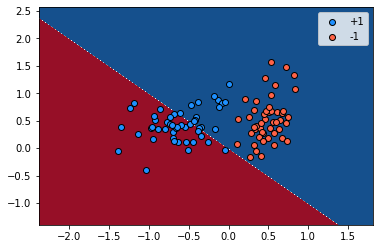

In [14]:
from utils import plot_decision_boundary

plot_decision_boundary(lambda x: predict(x, w), X, y_true)

### Un Paso del Algoritmo

Primero debemos buscar un elemento de entrenamiento mal clasificado:

In [15]:
y_pred = predict(X_train, w)

In [16]:
np.where(y_train != y_pred)

(array([ 0,  1,  2,  3,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22,
        23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 54, 55, 56, 57, 59]),)

Tomamos el primero:

In [17]:
i = 0

xi, yi = X_train[i], y_train[i]

Verificamos que la clasificación es incorrecta:

In [18]:
yi_pred = predict(xi, w)

yi, yi_pred

(1, -1.0)

Probemos graficar el punto:

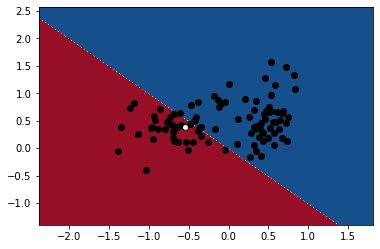

In [19]:
y_aux = np.ones(size)
y_aux[i] = -1

plot_decision_boundary(lambda x: predict(x, w), X, y_aux, special=True)

Ahora actualicemos el modelo y veamos si se corrige la clasificación:

In [20]:
r = 1.0  # learning rate
new_w = w + r * xi * yi

predict(xi, new_w)

1.0

Probemos otras tasas de aprendizaje, a ver qué pasa:

In [21]:
for r in [0.001, 0.01, 0.1, 0.5, 1.0]:
    new_w = w + r * xi * yi
    print(f'Tasa {r:5} | Predicción {predict(xi, new_w):5} | Parámetros {new_w}')

Tasa 0.001 | Predicción  -1.0 | Parámetros [0.99945051 1.00037864]
Tasa  0.01 | Predicción  -1.0 | Parámetros [0.99450514 1.00378644]
Tasa   0.1 | Predicción  -1.0 | Parámetros [0.94505136 1.03786438]
Tasa   0.5 | Predicción   1.0 | Parámetros [0.72525681 1.1893219 ]
Tasa   1.0 | Predicción   1.0 | Parámetros [0.45051362 1.3786438 ]


Lo dejamos en $r=1$. Evaluemos el nuevo modelo, para ver si mejora el resultado:

In [22]:
y_pred = predict(X_test, new_w)

accuracy(y_test, y_pred)

0.3

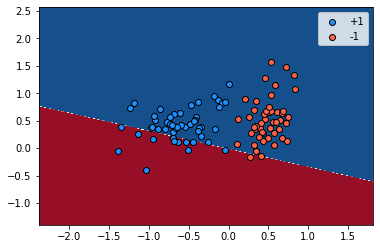

In [23]:
plot_decision_boundary(lambda x: predict(x, new_w), X, y_true)

## Perceptrón: Algoritmo completo

Implementaremos el algoritmo completo, iterando hasta que todos los datos de entrenamiento estén clasificados correctamente:

In [24]:
# 0. inicialización de w_0
w = np.ones(2)

r = 0.5
step = 0
finished = False
while not finished:
    # 1. predecir usando el modelo actual
    y_train_pred = predict(X_train, w)
    y_test_pred = predict(X_test, w)

    # 2. evaluar
    train_acc = accuracy(y_train, y_train_pred)
    test_acc = accuracy(y_test, y_test_pred)
    print(f'step={step}\ttrain_acc={train_acc:0.2}\ttest_acc={test_acc:0.2}')

    # 3. si no clasifica todo bien, actualizar modelo
    if (y_train == y_train_pred).all():
        finished = True
    else:
        indices = np.where(y_train != y_train_pred)
        i = indices[0][0]
        xi, yi = X_train[i], y_train[i]
        w = w + r * xi * yi

        step = step + 1

step=0	train_acc=0.17	test_acc=0.1
step=1	train_acc=0.32	test_acc=0.17
step=2	train_acc=0.37	test_acc=0.28
step=3	train_acc=0.37	test_acc=0.3
step=4	train_acc=0.48	test_acc=0.33
step=5	train_acc=0.52	test_acc=0.5
step=6	train_acc=0.78	test_acc=0.8
step=7	train_acc=0.97	test_acc=0.95
step=8	train_acc=0.87	test_acc=0.85
step=9	train_acc=1.0	test_acc=1.0


Grafiquemos el resultado final:

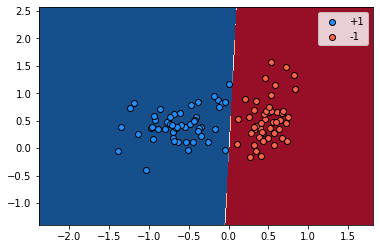

In [25]:
plot_decision_boundary(lambda x: predict(x, w), X, y_true)

## Ejercicios

1. Experimentar con otras tasas de aprendizaje.
2. Generar datos no linealmente separables (probar achicando el valor de `class_sep` en `make_classification`).
3. Adaptar el algoritmo del perceptrón para que funcione con estos datos (ver variante *pocket* en [Wikipedia](https://en.wikipedia.org/wiki/Perceptron)).
4. Hacer todo con el perceptrón de *scikit-learn* ([Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)).

In [26]:
def perceptron(X_train, X_test, y_train, y_test, intentos=10, r=0.5):
    # 0. inicialización de w_0
    w = np.ones(2)

    step = 0
    finished = False
    best = {'w': w, 'train_acc': 0, 'test_acc': 0, 'step': step}
    while not finished and step < intentos:
        # 1. predecir usando el modelo actual
        y_train_pred = predict(X_train, w)
        y_test_pred = predict(X_test, w)

        # 2. evaluar
        train_acc = accuracy(y_train, y_train_pred)
        test_acc = accuracy(y_test, y_test_pred)
        print(f'step={step}\ttrain_acc={train_acc:0.2}\ttest_acc={test_acc:0.2}')

        # 2.5. actualizar mejor solución
        if best['test_acc'] < test_acc:
            best['w'] = w
            best['step'] = step
            best['test_acc'] = test_acc
            best['train_acc'] = train_acc

        # 3. si no clasifica todo bien, actualizar modelo
        if (y_train == y_train_pred).all():
            finished = True
        else:
            indices = np.where(y_train != y_train_pred)
            i = indices[0][0]
            xi, yi = X_train[i], y_train[i]
            w = w + r * xi * yi

            step = step + 1

    return best

**Ejercicio 1**

In [27]:
for r in [0.001, 0.01, 0.1, 0.5, 1.0]:
    print(f'Rate r: {r}')
    best = perceptron(X_train, X_test, y_train, y_test, r=r)
    print(f'Best w: {best["w"]}')
    print('----------')

Rate r: 0.001
step=0	train_acc=0.17	test_acc=0.1
step=1	train_acc=0.17	test_acc=0.1
step=2	train_acc=0.17	test_acc=0.1
step=3	train_acc=0.17	test_acc=0.1
step=4	train_acc=0.17	test_acc=0.1
step=5	train_acc=0.17	test_acc=0.1
step=6	train_acc=0.17	test_acc=0.1
step=7	train_acc=0.18	test_acc=0.1
step=8	train_acc=0.18	test_acc=0.1
step=9	train_acc=0.18	test_acc=0.1
Best w: [1. 1.]
----------
Rate r: 0.01
step=0	train_acc=0.17	test_acc=0.1
step=1	train_acc=0.18	test_acc=0.1
step=2	train_acc=0.18	test_acc=0.1
step=3	train_acc=0.18	test_acc=0.1
step=4	train_acc=0.18	test_acc=0.1
step=5	train_acc=0.18	test_acc=0.1
step=6	train_acc=0.18	test_acc=0.1
step=7	train_acc=0.18	test_acc=0.1
step=8	train_acc=0.18	test_acc=0.1
step=9	train_acc=0.18	test_acc=0.1
Best w: [1. 1.]
----------
Rate r: 0.1
step=0	train_acc=0.17	test_acc=0.1
step=1	train_acc=0.2	test_acc=0.1
step=2	train_acc=0.22	test_acc=0.12
step=3	train_acc=0.25	test_acc=0.12
step=4	train_acc=0.3	test_acc=0.12
step=5	train_acc=0.3	test_acc=0

**Ejercicio 2**

In [28]:
X, y_true = make_classification(n_samples=size, n_features=2, n_classes=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, class_sep=0.1,
                                random_state=1)

# Etiquetas +1 y -1
y_true[y_true == 0] = -1

In [29]:
X.shape, y_true.shape

((100, 2), (100,))

Graficamos para ver el resultado. En esta parte, los *azules* son $+1$, los *rojos* son $-1$.

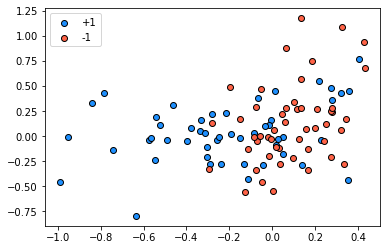

In [30]:
plt.scatter(X[y_true == +1, 0], X[y_true == +1, 1], color=cPositive, edgecolors='k', label="+1")
plt.scatter(X[y_true == -1, 0], X[y_true == -1, 1], color=cNegative, edgecolors='k', label="-1")

plt.legend()
plt.show()

In [31]:
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_true[:train_size], y_true[train_size:]

**Ejercicio 3**

In [32]:
best = perceptron(X_train, X_test, y_train, y_test, intentos=20)

step=0	train_acc=0.33	test_acc=0.3
step=1	train_acc=0.33	test_acc=0.3
step=2	train_acc=0.33	test_acc=0.3
step=3	train_acc=0.35	test_acc=0.3
step=4	train_acc=0.4	test_acc=0.3
step=5	train_acc=0.4	test_acc=0.33
step=6	train_acc=0.4	test_acc=0.33
step=7	train_acc=0.42	test_acc=0.33
step=8	train_acc=0.43	test_acc=0.3
step=9	train_acc=0.45	test_acc=0.33
step=10	train_acc=0.45	test_acc=0.35
step=11	train_acc=0.48	test_acc=0.35
step=12	train_acc=0.53	test_acc=0.33
step=13	train_acc=0.53	test_acc=0.35
step=14	train_acc=0.53	test_acc=0.4
step=15	train_acc=0.58	test_acc=0.4
step=16	train_acc=0.58	test_acc=0.45
step=17	train_acc=0.57	test_acc=0.47
step=18	train_acc=0.57	test_acc=0.47
step=19	train_acc=0.57	test_acc=0.47


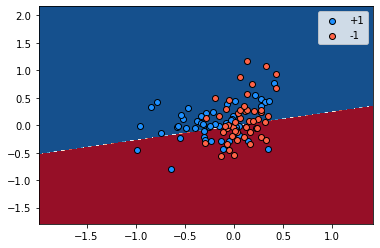

In [33]:
plot_decision_boundary(lambda x: predict(x, best['w']), X, y_true)

**Ejercicio 4**

In [34]:
from sklearn.linear_model import Perceptron

clf = Perceptron(random_state=0)

clf.fit(X_train, y_train)

clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.55, 0.425)

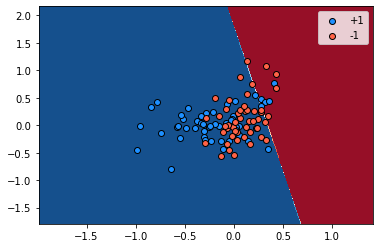

In [35]:
plot_decision_boundary(lambda x: clf.predict(x), X, y_true)

## Referencias

- [Perceptron (Wikipedia)](https://en.wikipedia.org/wiki/Perceptron)
- [Perceptron Learning Algorithm: A Graphical Explanation Of Why It Works](https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975)
- Gallant, S. I. (1990). [Perceptron-based learning algorithms.](https://ftp.cs.nyu.edu/~roweis/csc2515-2006/readings/gallant.pdf) IEEE Transactions on Neural Networks, vol. 1, no. 2, pp. 179–191. 

Scikit-learn:

- [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)
- [Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)